<a href="https://colab.research.google.com/github/misrori/scraping_2024/blob/main/session_5_slack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://api.slack.com/tutorials/tracks/uploading-files-python

In [ ]:
!pip3 install scrapethat slack_sdk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 9.3 MB/s eta 0:00:00


# Create a workspace
https://slack.com/get-started#/landing

# write some messagae than go to
https://api.slack.com/


# Send message

# Webhook
#Incoming Webhooks


In [ ]:
import requests

headers = {
    'Content-type': 'application/json',
}

json_data = {
    'text': 'Hello, slack!',
}

response = requests.post(
    'https://hooks.slack.com/services/....................',
    headers=headers,
    json=json_data,
)


# OAuth & Permissions


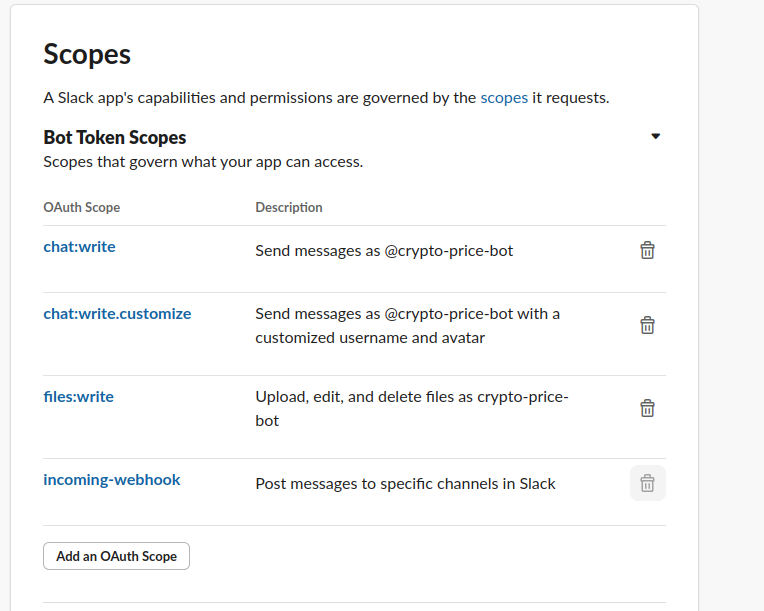


# Add the bot to the chanel with a @
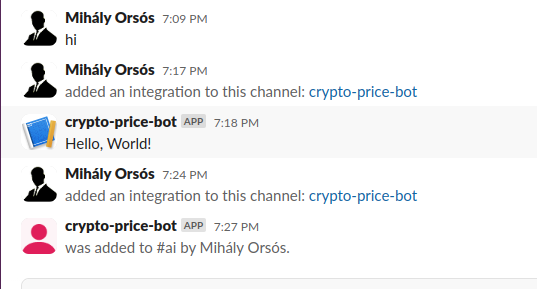




#Create plot

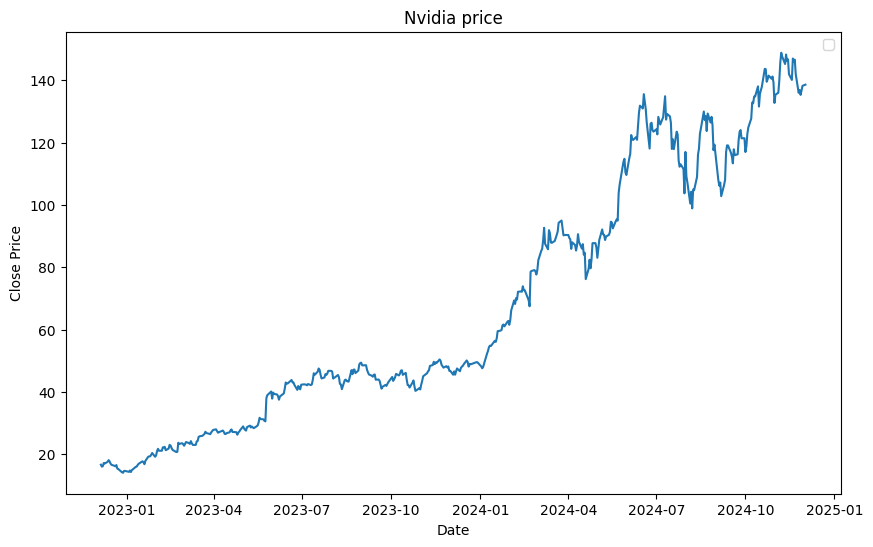

In [ ]:
# create a plot of TSLA close price of last year
from scrapethat import *
from plotnine import *
def get_olhc(ticker, range='2y', interval='1d' ):
    try:

        scraper = cloudscraper.create_scraper()
        response = scraper.get(f"https://query1.finance.yahoo.com/v8/finance/chart/{ticker}?interval={interval}&range={range}")
        t= response.json()
        df = pd.DataFrame(t['chart']['result'][0]['indicators']['quote'][0])
        df['date'] = pd.to_datetime(t['chart']['result'][0]['timestamp'], unit='s').date
        df = df[['date', 'open', 'low', 'high', 'close', 'volume']]
        df['name']= ticker
        return(df)

    except:
        print('error')
        pass


df = get_olhc('NVDA')

import matplotlib.pyplot as plt
# Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'])

plt.title('Nvidia price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Save the plot as a PNG file
plt.savefig('nvda.png')

# Show the plot (optional)
plt.show()


In [ ]:
import plotly.express as px

fig = px.line(df, x='date', y='close', title='Nvidia Price')  # Add line_group to treat all data points as a single line

# Save the plot as an HTML file
fig.write_html('nvda.html')

# Display the plot (optional)
fig.show()

In [ ]:
from slack_sdk import WebClient
import os

# Slack API token and channel ID
slack_token = "xoxb-..............."

# Initialize Slack client
client = WebClient(token=slack_token)



# Bot id


In [ ]:
auth_test = client.auth_test()
bot_user_id = auth_test["user_id"]
print(f"App's bot user: {bot_user_id}")

App's bot user: U083P205T2M


# Channel id

In [ ]:
# get channel id-s
response = client.conversations_list()

# Print channel names and IDs
for channel in response["channels"]:
    print(f"Channel Name: {channel['name']}, Channel ID: {channel['id']}")

Channel Name: social, Channel ID: C083A9QRBQA
Channel Name: ai, Channel ID: C083P0Q4UMP
Channel Name: all-ceudemo2024, Channel ID: C083Z3RKBL0


# Send message

In [ ]:
client.chat_postMessage(
    channel="...",
    text=f"Hello slack, let's go",
)

# Send plot

In [ ]:
# Step 1: Request an upload URL
upload_text_file = client.files_upload_v2(
    title="Nvidia plot",
    file="nvda.png",
)

file_url = upload_text_file.get("file").get("permalink")
new_message = client.chat_postMessage(
    channel="......",
    text=f"Nvidia chart: {file_url}",
)

In [ ]:
# Step 1: Request an upload URL
upload_text_file = client.files_upload_v2(
    title="Nvidia plot",
    file="nvda.html",
)

file_url = upload_text_file.get("file").get("permalink")
new_message = client.chat_postMessage(
    channel="C083P0Q4UMP",
    text=f"Nvidia chart in html: {file_url}",
)

# List files

In [ ]:
uploaded_files = client.files_list(user='....') # bot id

file_ids = []
# The Python SDK will automatically paginate for you within a for-loop.
for page in uploaded_files:
    for file in page.get("files", []):
        file_ids.append(file["permalink"])

file_ids

['https://ceudemo2024.slack.com/files/U083P205T2M/F083AK3VBMY/test.txt',
 'https://ceudemo2024.slack.com/files/U083P205T2M/F0837RGBL85/plot.png',
 'https://ceudemo2024.slack.com/files/U083P205T2M/F083BAG6405/tsla.png',
 'https://ceudemo2024.slack.com/files/U083P205T2M/F083BAV0U5T/tsla.png',
 'https://ceudemo2024.slack.com/files/U083P205T2M/F083SSJE3GR/tsla.html',
 'https://ceudemo2024.slack.com/files/U083P205T2M/F083BD6KCUD/nvda.png',
 'https://ceudemo2024.slack.com/files/U083P205T2M/F0837L44ZFY/nvda.html']